# Экспериментальное исследование алгоритмов для регулярных запросов

### Введение
В данной работе рассматривается задача достижимости в графе между всеми парами вершин
и с заданным множеством стартовых вершин с регулярными ограничениями. А именно исследуются три задачи достижимости:
1. Достижимость между всеми парами вершин.
2. Достижимость для всего множества заданных вершин.
3. Достижимость для каждой вершины из заданного множества стартовых вершин.

### Описание исследуемых решений
Реализация алгоритма для решения поставленных задач представлена в `project.regular.regular_path_query` при следующих запросах:
1. Задача достижимости между всеми парами вершин -
`rpq_bfs(regex: Regex, graph: MultiDiGraph, option = True, mtx_type_matrix = type)`
2. Достижимость для всего множества заданных вершин -
`rpq_bfs(regex: Regex, graph: MultiDiGraph, start_nodes = start_nodes, mtx_type_matrix = type)`
3. Достижимость для каждой вершины из заданного множества стартовых вершин -
`rpq_bfs(regex: Regex, graph: MultiDiGraph, option = True, start_nodes = start_nodes, mtx_type_matrix = type)`

### Цель работы
Целью работы является анализ производительности алгоритмов решения ранее описанных задач достижимости между всеми парами вершин и с заданным
множеством стартовых вершин с регулярными ограничениями.

Для достижения поставленной цели необходимо ответить на следующие вопросы.
- Какое представление разреженных матриц и векторов лучше подходит для каждой из решаемых задач?
- Начиная с какого размера стартового множества выгоднее решать задачу для всех пар и выбирать нужные?
- На сколько решение второй задачи медленнее решения третьей при одинаковых начальных условиях?

### Описание набора данных для экспериментов
#### Графы
Использовались следующие графы из [набора](https://jetbrains-research.github.io/CFPQ_Data/dataset/index.html):
- [skos](https://jetbrains-research.github.io/CFPQ_Data/dataset/data/skos.html#skos) - 144 вершин, 252 ребра.
- [core](https://jetbrains-research.github.io/CFPQ_Data/dataset/data/core.html#gzip) - 1323 вершины, 2752 ребра.
- [enzyme](https://jetbrains-research.github.io/CFPQ_Data/dataset/data/enzyme.html#enzyme) - для ответа на второй вопрос,
48815 вершин, 86543 ребра.

Данный выбор был сделан для того, чтобы собрать информацию о работе графов с различным количеством рёбер и вершин. При этом
графы с большим количеством вершин (>2000) на имеющемся оборудовании для задачи достижимости для каждой вершины из заданного
множества обрабатывались неоправданно долго, поэтому было решено не включать их в эксперимент.

#### Регулярные запросы
Использовались следующие регулярные запросы к графам:
- (l1 l2)*|(l0 l3)
- (l1 | l2)* l3
- (l3 | l0) l1*
- l1 l2 l3 (l0 | l1)*,

где l - наиболее часто встречающиеся метки на рёбрах.

### Описание эксперимента
#### Оборудование
Процессор: Intel(R) Core i7-8750H 2.20GHz, 6 ядер, 12 логических процессоров.

Кэш: L1 - 384 Кб, L2 - 1,5 Мб, L3 9 Мб.

Оперативной памяти: 32,0 ГБ.

ОС: Windows 10.

Версия Python: 3.10
#### Подробности проведения замеров
Для ответа на каждый из поставленных вопросов было необходимо определить, какие параметры могли повлиять на результат исследования.

**1 вопрос.**
Для определения того, какое представление разреженных матриц и векторов является лучшим для каждой из задач, было решено
измерить скорость работы алгоритмов на выбранных графах с указанными выше регулярными ограничениями при фиксированном наборе
стартовых вершин на следующих представлениях разреженных матриц: [dok_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.dok_matrix.html#scipy.sparse.dok_matrix),
[lil_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.lil_matrix.html#scipy.sparse.lil_matrix),
[csc_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_matrix.html#scipy.sparse.csc_matrix),
[csr_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix).

**2 вопрос.** Для определения того, при каких размерах стартового множества становится выгоднее решать задачу для всех пар
и выбирать нужные, было решено зафиксировать представление матрицы и изменять значение стартовых вершин на графах, применяя
к ним указанные выше регулярные запросы.

**3 вопрос.** Для определения разницы во времени решений второй и третьей задачи было решено измерить и сравнить время их работы на графах
и регулярных ограничениях с различными наборами стартовых вершин.

Каждый замер проводился 5 раз и выводилось его среднее значение со стандартным отклонением.

### Результаты
Далее будут представлены код, визуальное отображение полученной информации и, исходя из этого, ответы на поставленные вопросы.
#### 1. Какое представление разреженных матриц и векторов лучше подходит для каждой из решаемых задач?

C:\Users\User\AppData\Local\Temp\ipykernel_3984\2502165178.py:103: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  value.append(mean(times))
C:\Users\User\PycharmProjects\formal-lang-course\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\User\PycharmProjects\formal-lang-course\venv\lib\site-packages\scipy\sparse\_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
C:\Users\User\PycharmProjects\formal-lang-course\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\User\PycharmProject

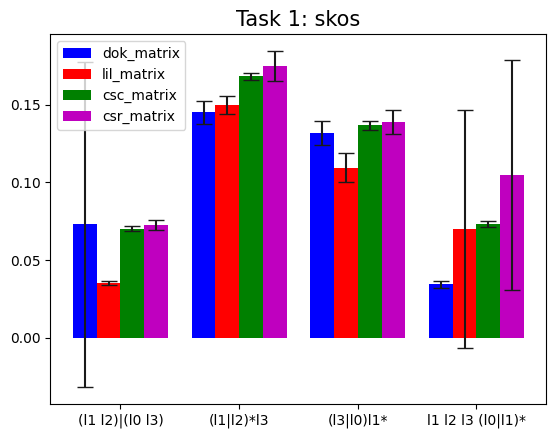

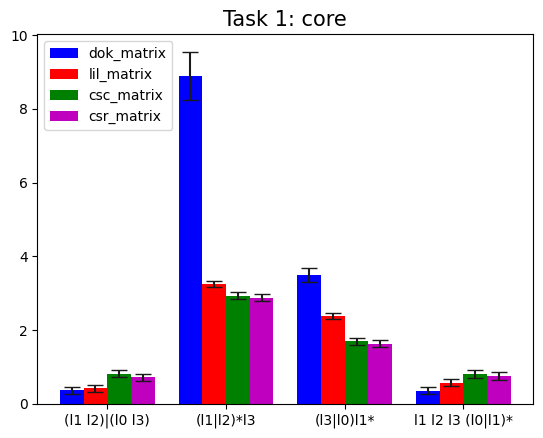

In [ ]:
import logging
import time
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cfpq_data import generate_multiple_source_percent
from pyformlang.regular_expression import Regex
from scipy import mean
from scipy.sparse import csr_matrix, csc_matrix, dok_matrix
from scipy.stats import tstd

from project.regular.graph_utils import *
from project.regular.regular_path_query import *

names = ["skos", "core"]
types = [dok_matrix, lil_matrix, csc_matrix, csr_matrix]
number_of_repetition = 5


def create_regexes(mcl):
    regexes = list()
    regexes.append(("(l1 l2)|(l0 l3)", Regex(f"({mcl[1]}{mcl[2]})|({mcl[0]}{mcl[3]})")))
    regexes.append(("(l1|l2)*l3", Regex(f"({mcl[1]}|{mcl[2]})*{mcl[3]}")))
    regexes.append(("(l3|l0)l1*", Regex(f"({mcl[3]}|{mcl[0]}){mcl[1]}")))
    regexes.append(
        ("l1 l2 l3 (l0|l1)*", Regex(f"{mcl[1]}{mcl[2]}{mcl[3]}({mcl[0]}|{mcl[1]})*"))
    )
    return regexes


def create_start_states(graph, percent, seed):
    return generate_multiple_source_percent(graph, percent, seed=seed)


def calc_common_labels(graph):
    labels = list()
    for (_, _, l) in graph.edges(data="label"):
        labels.append(l)
    return [label for (label, _) in Counter(labels).most_common(4)]


def create_bar_chart(task, perc, tps, q_numb):
    for name in names:
        for p in perc:
            index = np.arange(4)
            bw = 0.2
            if task == 1:
                plt.title(
                    "Task " + str(task) + ": " + name,
                    fontsize=15,
                )
            else:
                plt.title(
                    "Task "
                    + str(task)
                    + ": "
                    + name
                    + " with "
                    + str(p)
                    + "% of start states",
                    fontsize=15,
                )
            graph = get_graph(name)
            regexes = create_regexes(calc_common_labels(graph))
            xticks = list()
            for com, _ in regexes:
                xticks.append(com)
            if q_numb == 1:
                plt.xticks(index + 1.5 * bw, xticks)
            elif q_numb == 3:
                plt.xticks(index, xticks)
            colors = ["b", "r", "g", "m"]
            for i, tp in enumerate(tps):
                value = list()
                std = list()
                for (_, regex) in regexes:
                    times = list()
                    for _ in range(number_of_repetition):
                        st = time.time()
                        if task == 1:
                            rpq_bfs(regex, graph, option=True, mtx_type_matrix=tp)
                        elif task == 2:
                            rpq_bfs(
                                regex,
                                graph,
                                mtx_type_matrix=tp,
                                start_nodes=create_start_states(graph, p, 15),
                            )
                        elif task == 3:
                            rpq_bfs(
                                regex,
                                graph,
                                mtx_type_matrix=tp,
                                option=True,
                                start_nodes=create_start_states(graph, p, 15),
                            )
                        times.append(time.time() - st)
                    value.append(mean(times))
                    std.append(tstd(times))
                plt.bar(
                    index + i * bw,
                    value,
                    bw,
                    color=colors[i],
                    yerr=std,
                    error_kw={"ecolor": "0.1", "capsize": 6},
                    label=tp.__name__,
                )
            plt.legend(loc=2)
            plt.show()

logging.getLogger().disabled = True
create_bar_chart(1, perc={15}, tps=types, q_numb=1)

C:\Users\User\AppData\Local\Temp\ipykernel_3984\2232501449.py:74: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  value.append(mean(times))


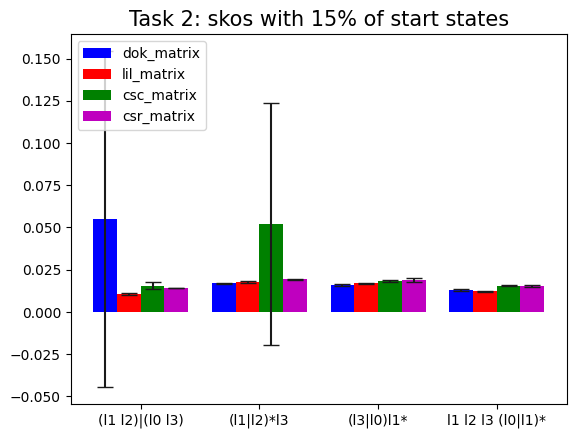

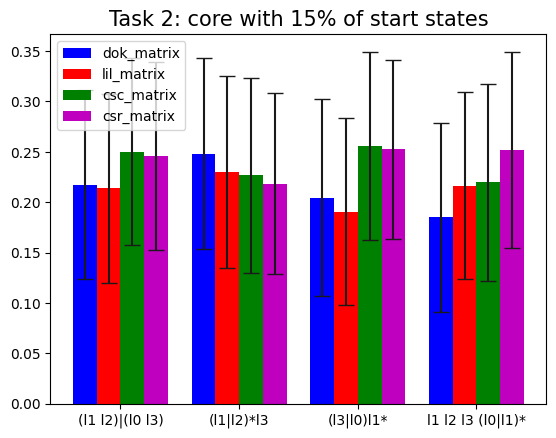

In [ ]:
create_bar_chart(2, perc={15}, tps=types, q_numb=1)

C:\Users\User\AppData\Local\Temp\ipykernel_3984\2232501449.py:74: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  value.append(mean(times))


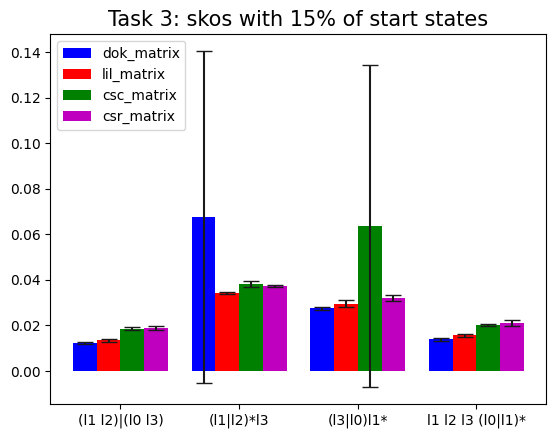

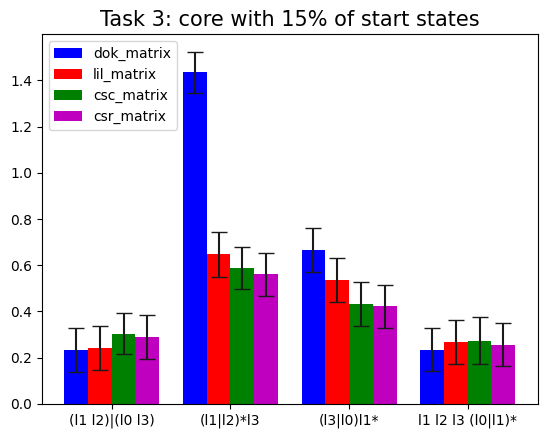

In [ ]:
create_bar_chart(3, perc={15}, tps=types, q_numb=1)

На данных диаграммах представлена зависимость времени выполнения алгоритма в секундах от выбранного регулярного
выражения для разных представлений матриц. Как можно заметить, стандартное отклонение на графе `skos` в некоторых случаях
становится огромным, что можно объяснить малым количеством вершин и ребер и, как следствие, слишком малым временем выполнения
алгоритма, из-за чего каждое возможное прерывание сильно влияет на результат.

Исходя из полученных данных, нельзя сказать, что одно представление всегда отрабатывает быстрее других. Для первой и второй
задач лучшие результаты показывала `lil_matrix`, однако в третьей задаче время работы `csr_matrix` было меньше либо равным
остальным представлениям в пределах стандартного отклонения.

Таким образом, в последующих задачах будет использоваться представление в виде `lil_matrix` как наиболее оптимальное.
#### 2. Начиная с какого размера стартового множества выгоднее решать задачу для всех пар и выбирать нужные?

C:\Users\User\AppData\Local\Temp\ipykernel_3984\2152882448.py:18: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  value.append(mean(times))


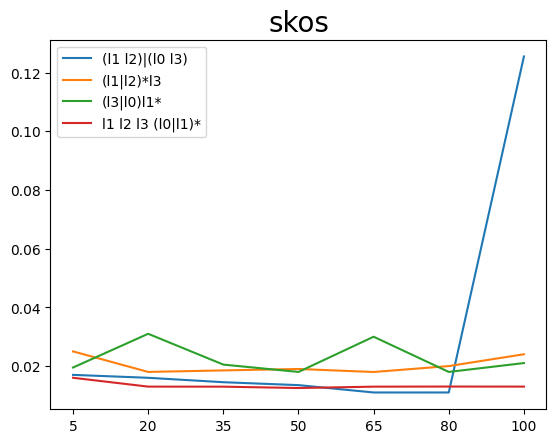

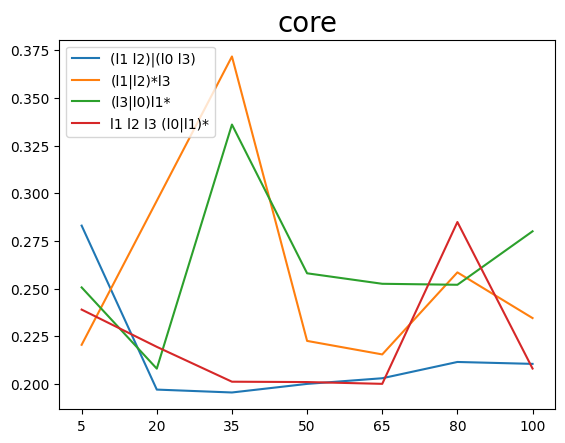

In [ ]:
def create_line_chart(graphs):
    for name in graphs:
        index = np.arange(7)
        plt.title(name, fontsize=20)
        graph = get_graph(name)
        regexes = create_regexes(calc_common_labels(graph))
        perc = [5, 20, 35, 50, 65, 80, 100]
        plt.xticks(index, perc)
        data = dict()
        for i, (com, regex) in enumerate(regexes):
            value = list()
            for p in perc:
                times = list()
                for _ in range(number_of_repetition):
                    st = time.time()
                    rpq_bfs(regex, graph, start_nodes=create_start_states(graph, p, 15))
                    times.append(time.time() - st)
                value.append(mean(times))
            data[com] = value
        df = pd.DataFrame(data)
        plt.plot(index, df)
        plt.legend(data, loc=2)
        plt.show()

create_line_chart(names)

Для ответа на данный вопрос измерялось время действия алгоритма для решения задачи достижимости для всего множества заданных
стартовых вершин (2 задача достижимости) в зависимости от процентного соотношения стартовых вершин ко всем.

Из полученных данных нельзя однозначно сказать, с какого размера стартового множества становится выгоднее решать задачу
достижимости.

Так как задача для всего множества заданных вершин решается быстрее, чем для каждой отдельной вершины, было решено
провести эксперимент над графом с большим количеством вершин и ребер, а именно [enzyme](https://jetbrains-research.github.io/CFPQ_Data/dataset/data/enzyme.html#enzyme).

C:\Users\User\AppData\Local\Temp\ipykernel_3984\2152882448.py:18: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  value.append(mean(times))


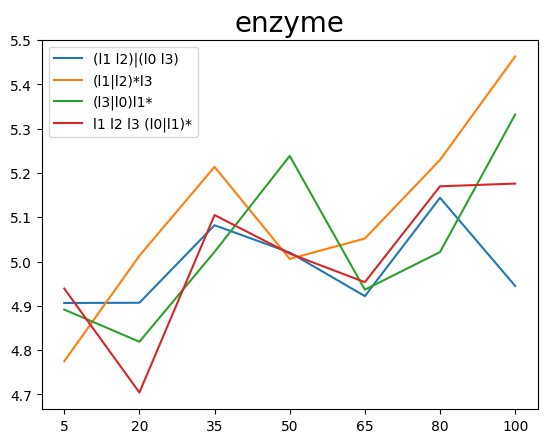

In [ ]:
create_line_chart(["enzyme"])

На данном графике видно, что выгоднее всего брать как можно меньшее количество стартовых вершин.
### 3. На сколько решение второй задачи медленнее решения третьей при одинаковых начальных условиях?
Были проведены измерения времени работы алгоритма для второй и третьей задачи при 15, 40 и 85 процентах стартовых вершин.
Результаты представлены на диаграммах.

C:\Users\User\AppData\Local\Temp\ipykernel_3984\2232501449.py:74: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  value.append(mean(times))


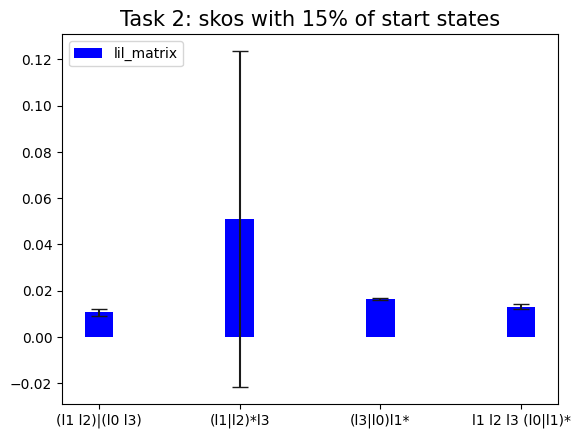

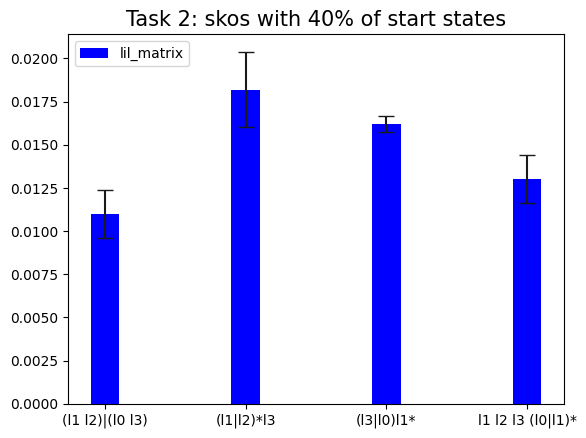

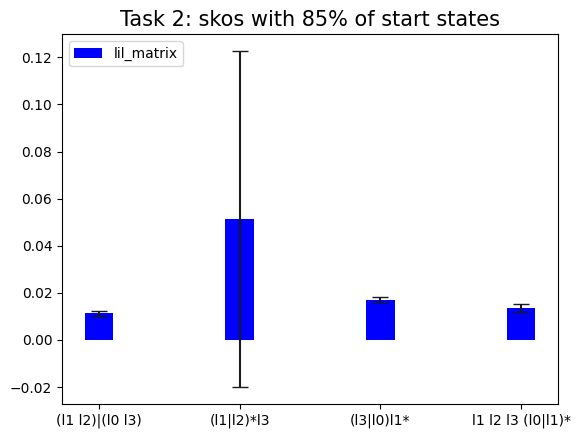

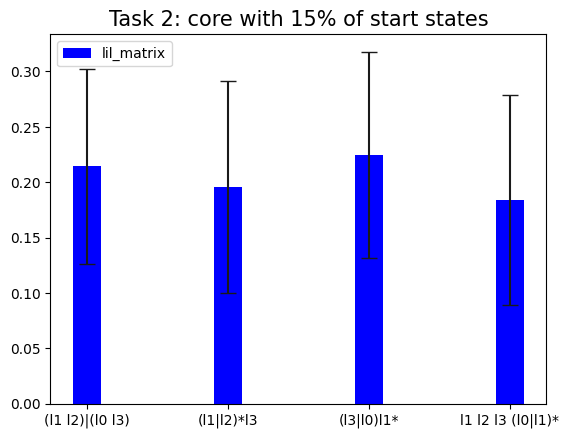

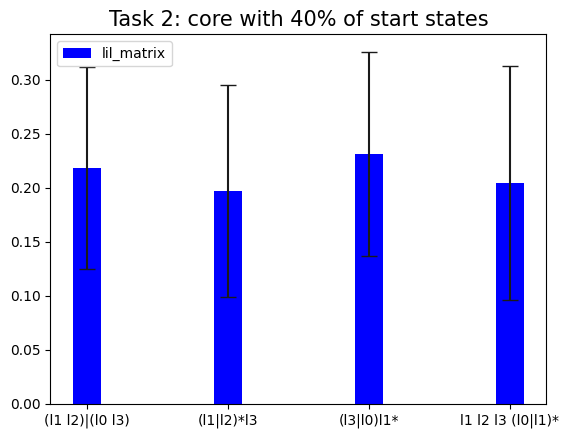

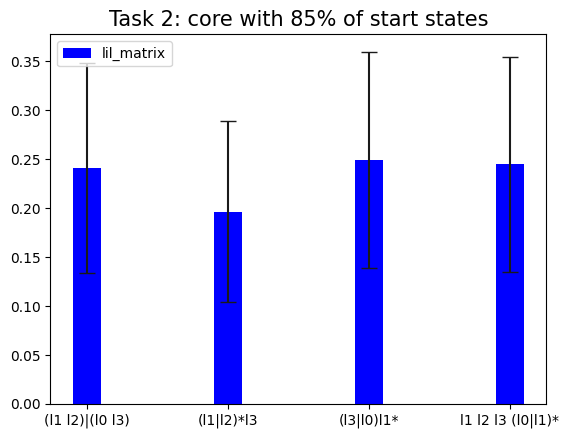

In [ ]:
percs = [15, 40, 85]
create_bar_chart(2, perc=percs, tps=[lil_matrix], q_numb=3)

C:\Users\User\AppData\Local\Temp\ipykernel_3984\2232501449.py:74: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  value.append(mean(times))


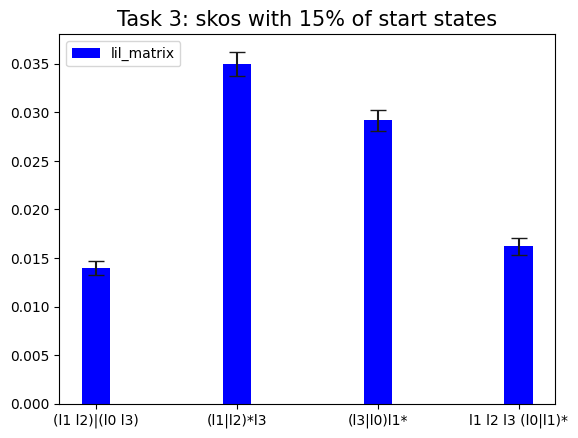

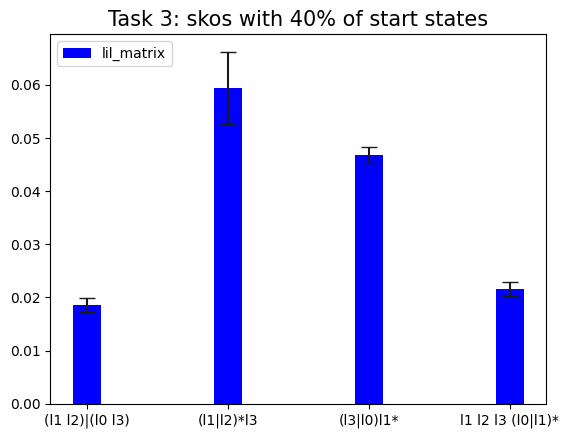

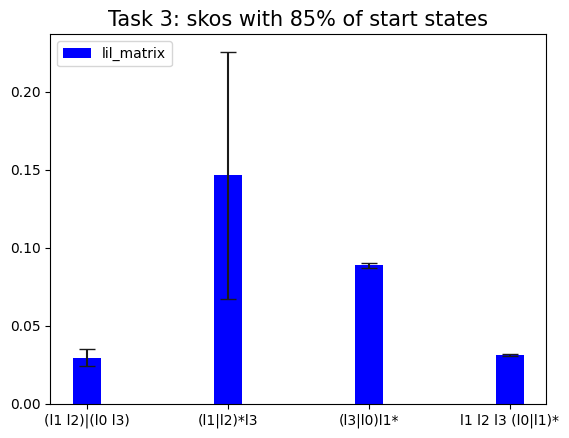

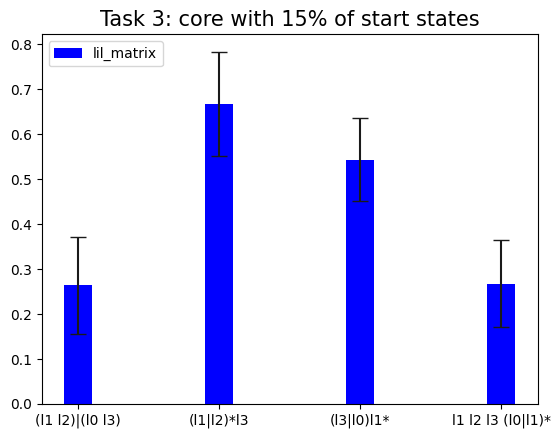

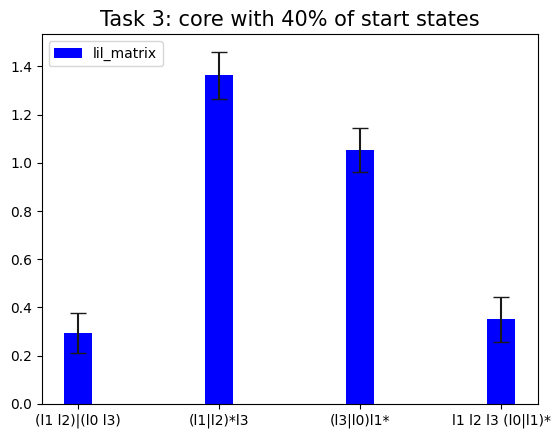

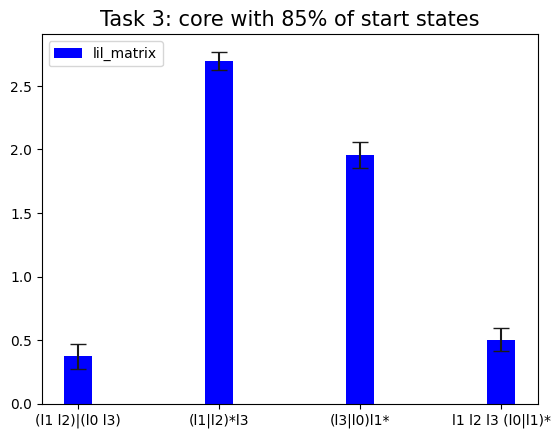

In [ ]:
create_bar_chart(3, perc=percs, tps=[lil_matrix], q_numb=3)

По полученным данным можно прийти к выводу, что вторая задача (достижимость для всего множества заданных вершин) всегда работает
быстрее, чем достижимость для каждой вершины из заданного множества стартовых вершин. Данный результат не удивителен,
ведь для решения последней задачи используются большие матрицы, чем для второй задачи, и больше матричных умножений.
